# RANDOM_FOREST_REGRESSOR_WITH_HYPERTUNNING

## ABOUT DATASET

TFI has provided a dataset with 137 restaurants in the training set, and a test set of 100000 restaurants. The data columns include the open date, location, city type, and three categories of obfuscated data: Demographic data, Real estate data, and Commercial data. The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis.

## Data Fields
__Id__ : Restaurant id. 

__Open Date__ : opening date for a restaurant

__City__ : City that the restaurant is in. Note that there are unicode in the names. 

__City Group__: Type of the city. Big cities, or Other. 

__Type__: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile

__P1, P2 - P37__: There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.

__Revenue__: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 

## IMPORTING LIB.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Loading data_set

In [2]:
data=pd.read_csv('train.csv')
data.head()

Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  3.0    0    0    0    0    0    0    0    0  6923131.0  
2  3.0    0    0    0    0    0    0    0    0  2055379.0  
3  7.5   25   12   10    6   18   12   12    6  2675511.0  
4  3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 43 columns]

In [3]:
revenue=data['revenue']

In [4]:
data.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

## Data_insights

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [6]:
data.describe()

Id          P1          P2          P3          P4          P5  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean    68.000000    4.014599    4.408759    4.317518    4.372263    2.007299   
std     39.692569    2.910391    1.514900    1.032337    1.016462    1.209620   
min      0.000000    1.000000    1.000000    0.000000    3.000000    1.000000   
25%     34.000000    2.000000    4.000000    4.000000    4.000000    1.000000   
50%     68.000000    3.000000    5.000000    4.000000    4.000000    2.000000   
75%    102.000000    4.000000    5.000000    5.000000    5.000000    2.000000   
max    136.000000   12.000000    7.500000    7.500000    7.500000    8.000000   

               P6          P7          P8          P9  ...         P29  \
count  137.000000  137.000000  137.000000  137.000000  ...  137.000000   
mean     3.357664    5.423358    5.153285    5.445255  ...    3.135036   
std      2.134235    2.296809    1.858567    1.834793  ...    1.680887   
min      1.000000    1.000000    1.000000    4.000000  ...    0.000000   
25%      2.000000    5.000000    4.000000    4.000000  ...    2.500000   
50%      3.000000    5.000000    5.000000    5.000000  ...    3.000000   
75%      4.000000    5.000000    5.000000    5.000000  ...    3.000000   
max     10.000000   10.000000   10.000000   10.000000  ...    7.500000   

              P30         P31         P32         P33         P34         P35  \
count  137.000000  137.000000  137.000000  137.000000  137.000000  137.000000   
mean     2.729927    1.941606    2.525547    1.138686    2.489051    2.029197   
std      5.536647    3.512093    5.230117    1.698540    5.165093    3.436272   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      4.000000    3.000000    3.000000    2.000000    3.000000    4.000000   
max     25.000000   15.000000   25.000000    6.000000   24.000000   15.000000   

              P36         P37       revenue  
count  137.000000  137.000000  1.370000e+02  
mean     2.211679    1.116788  4.453533e+06  
std      4.168211    1.790768  2.576072e+06  
min      0.000000    0.000000  1.149870e+06  
25%      0.000000    0.000000  2.999068e+06  
50%      0.000000    0.000000  3.939804e+06  
75%      3.000000    2.000000  5.166635e+06  
max     20.000000    8.000000  1.969694e+07  

[8 rows x 39 columns]

In [7]:
data.shape

(137, 43)

## Checking catogarical columns

In [8]:
data['City Group'].unique()

array(['Big Cities', 'Other'], dtype=object)

In [9]:
data['Open Date']

0      07/17/1999
1      02/14/2008
2      03/09/2013
3      02/02/2012
4      05/09/2009
          ...    
132    06/25/2008
133    10/12/2006
134    07/08/2006
135    10/29/2010
136    09/01/2009
Name: Open Date, Length: 137, dtype: object

## City unique columns

In [10]:
data['City'].unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [11]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [12]:
import plotly

In [13]:
pd.options.plotting.backend='plotly'

# Data visualization

In [14]:
cityPerc =data[["City Group", "revenue"]].groupby(['City Group'],as_index=False).mean()
cityPerc

City Group       revenue
0  Big Cities  4.983480e+06
1       Other  3.752924e+06

<AxesSubplot:xlabel='City Group', ylabel='revenue'>

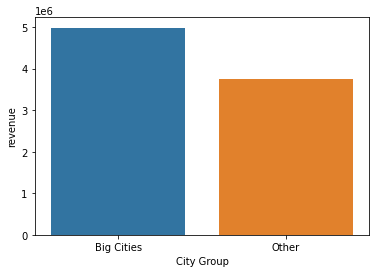

In [15]:
sns.barplot(x='City Group', y='revenue', data=cityPerc)

In [16]:
data.Type.unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [17]:
pd.options.plotting.backend="plotly"

<AxesSubplot:xlabel='City', ylabel='revenue'>

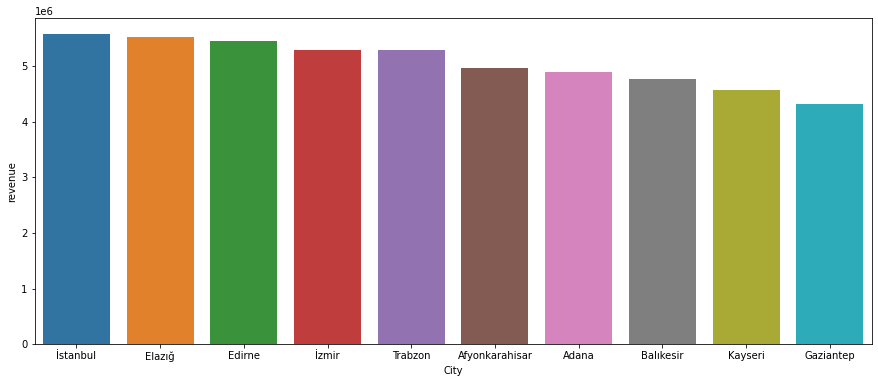

In [18]:
plt.figure(figsize=(15,6))
cityPerc = data[["City", "revenue"]].groupby(['City'],as_index=False).mean()

newDF = cityPerc.sort_values(["revenue"],ascending= False)
sns.barplot(x='City', y='revenue', data=newDF.head(10))

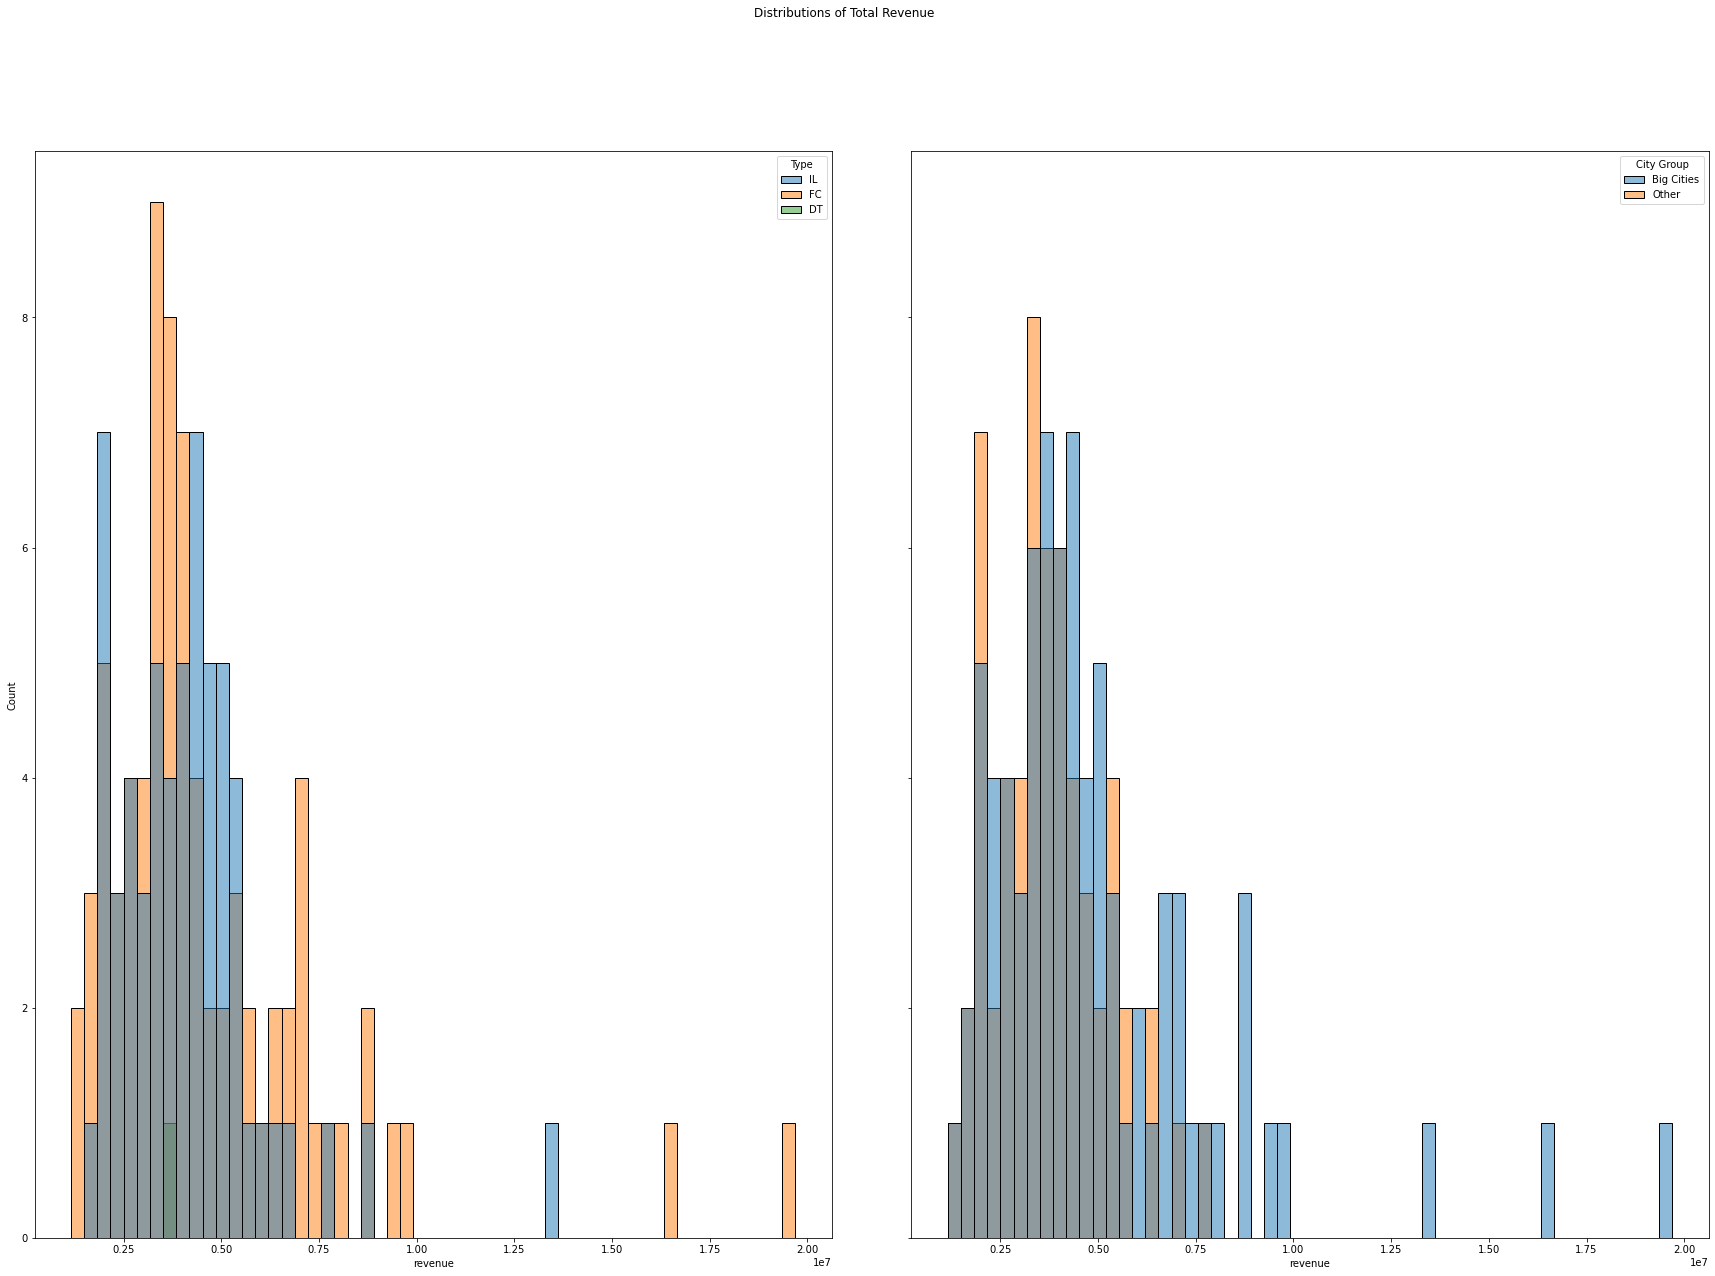

In [19]:
fig=plt.figure(figsize=(30,20))
gs = fig.add_gridspec(1, 2, hspace=0.7, wspace=0.1)
(ax1, ax2) = gs.subplots(sharex='col', sharey='row')
fig.suptitle('Distributions of Total Revenue')
#fig.subplots_adjust(top=0.85)

sns.histplot(data=data, x='revenue', bins=55,hue='Type', ax=ax1)
sns.histplot(data=data, x='revenue', bins=55,hue='City Group', ax=ax2)
plt.show()

<AxesSubplot:xlabel='months', ylabel='revenue'>

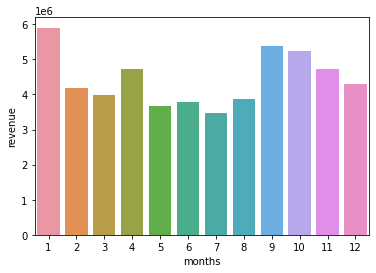

In [20]:

month = pd.DataFrame()
month["months"] = data["Open Date"].transform(lambda x: int(x.split("/")[0]))
month = pd.concat([month,revenue],axis=1)

newD=month[['months','revenue']].groupby(['months'],as_index=False).mean()
sns.barplot(x='months', y='revenue', data=newD)

## HEAT_MAP

<AxesSubplot:>

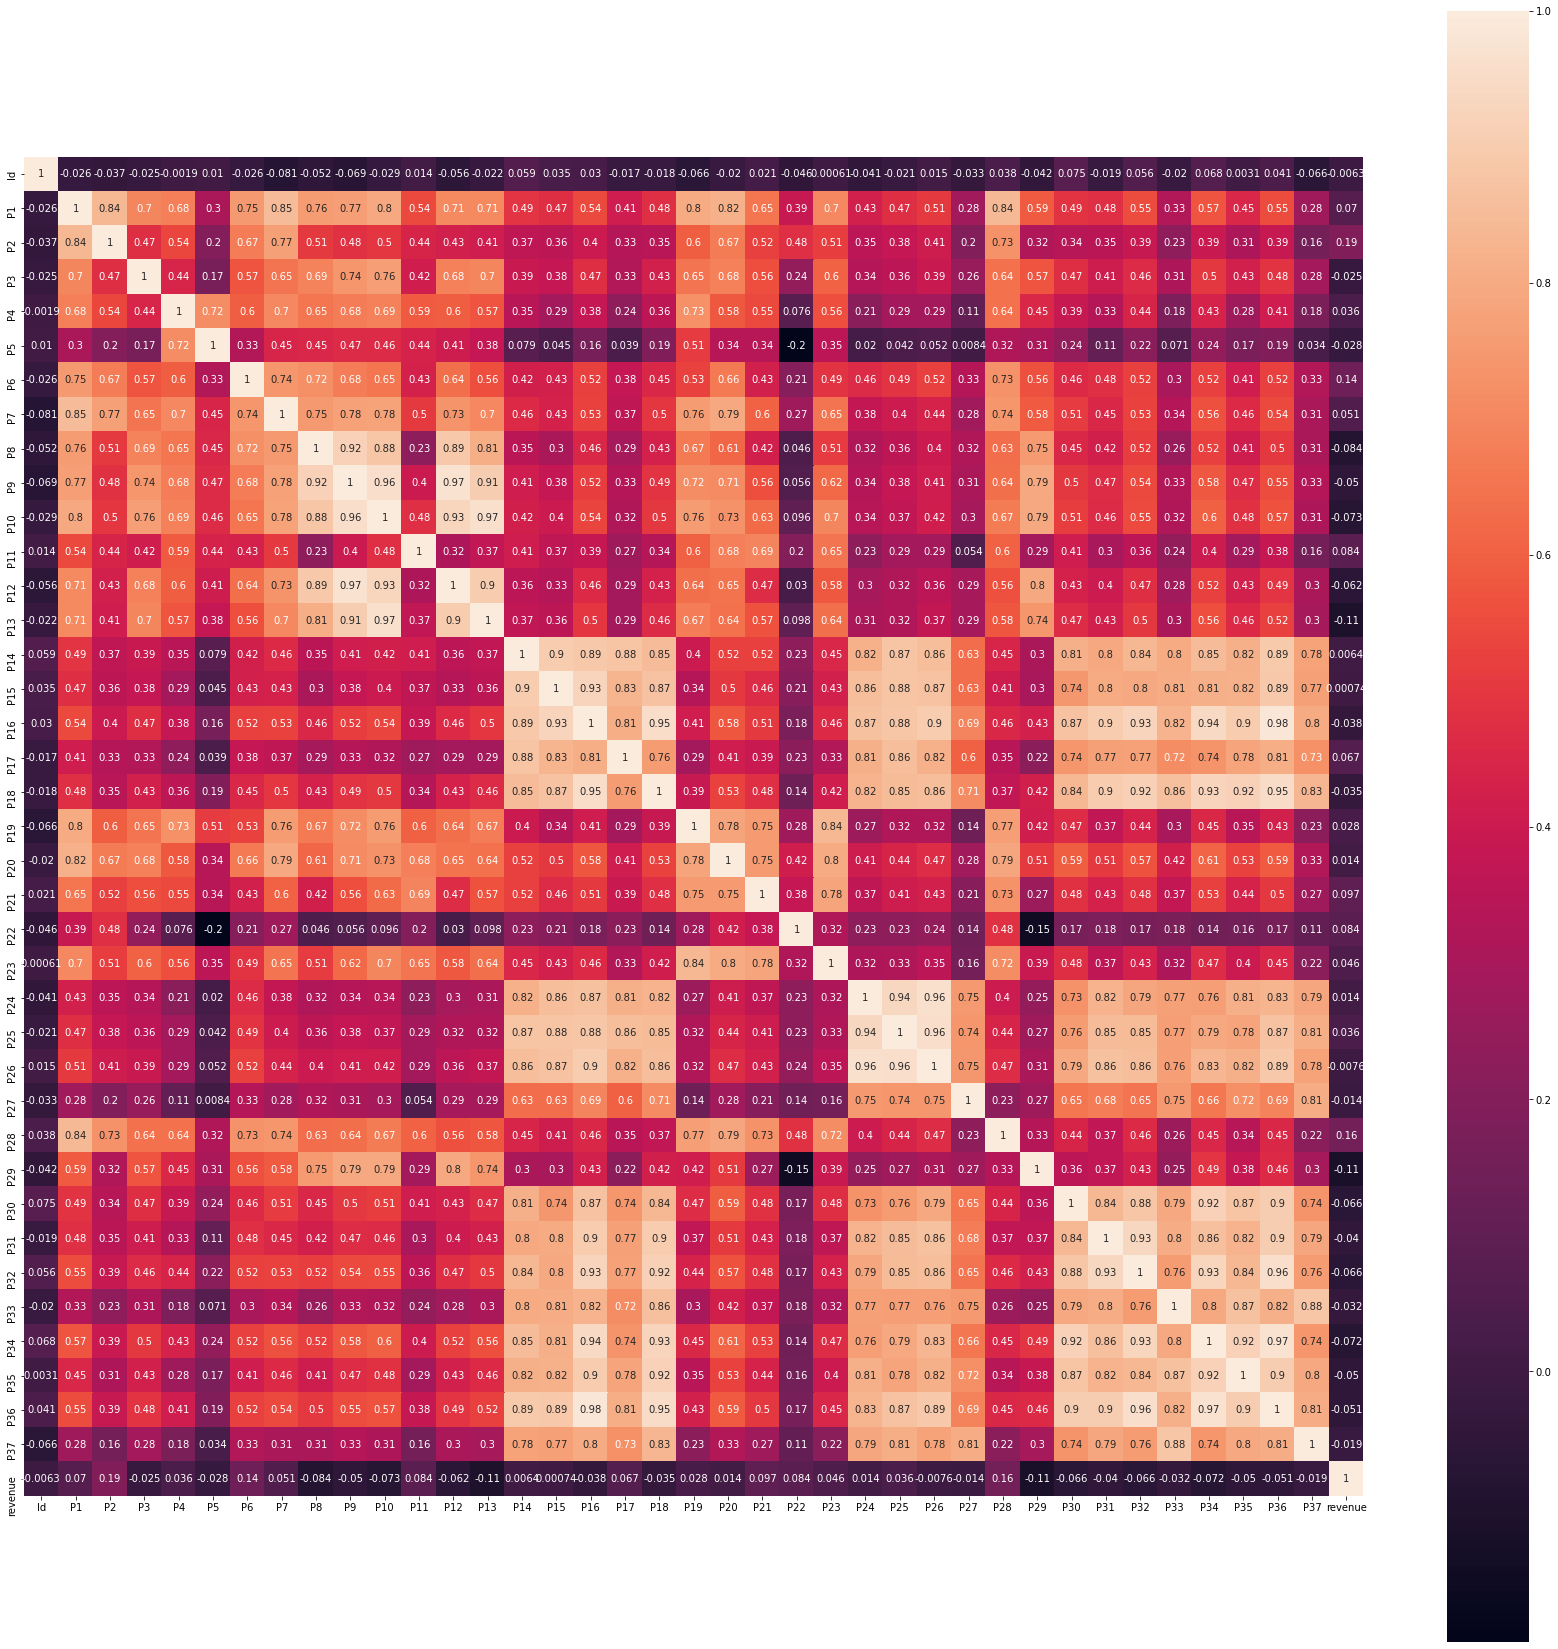

In [21]:
plt.figure(figsize=(30,30))
corr = data.corr()
sns.heatmap(data=corr, square=True, annot=True, cbar=True)

## JOINT_PLOT

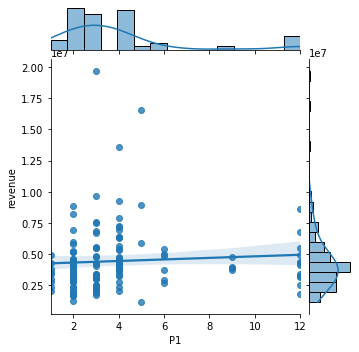

In [22]:
sns.jointplot(x='P1', y='revenue' , data=data , kind='reg', height=5)

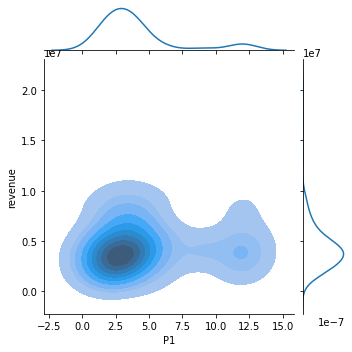

In [23]:
sns.jointplot(x='P1', y='revenue' , data=data , kind='kde',shade=True, height=5)

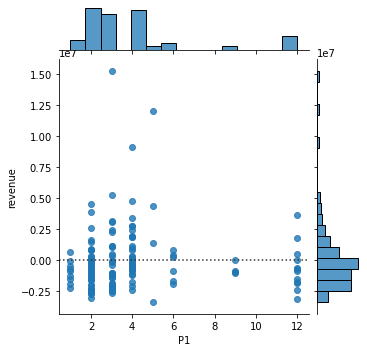

In [24]:
sns.jointplot(x='P1', y='revenue' , data=data , kind='resid', height=5)

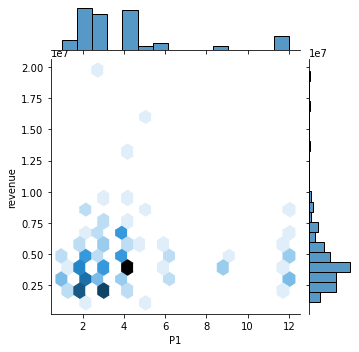

In [25]:
sns.jointplot(x='P1', y='revenue' , data=data , kind='hex', height=5)

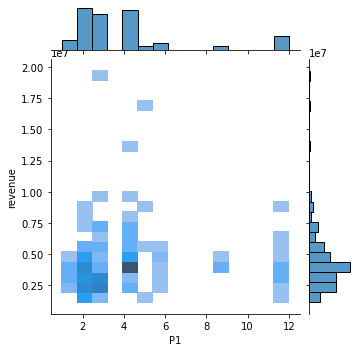

In [26]:
sns.jointplot(x='P1', y='revenue' , data=data , kind='hist', height=5)

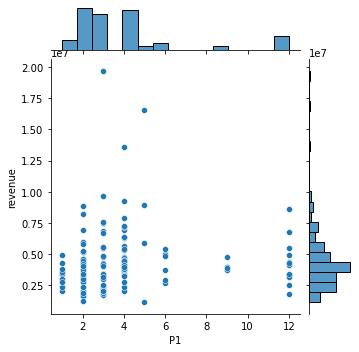

In [27]:
sns.jointplot(x='P1', y='revenue' , data=data , kind='scatter', height=5)

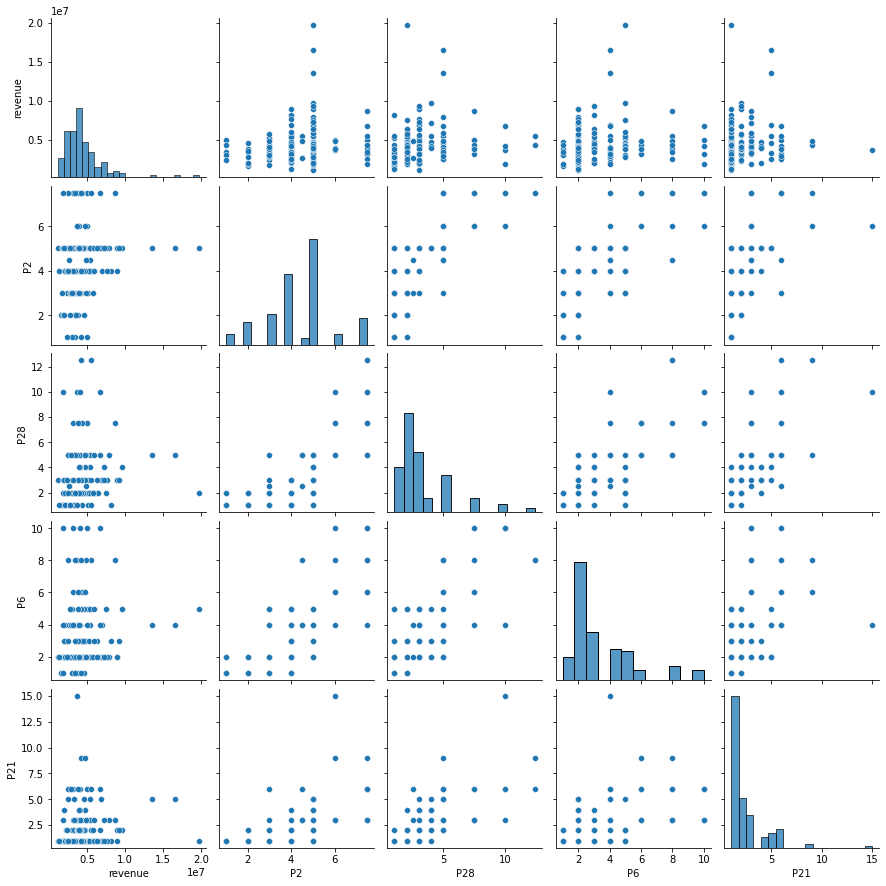

In [28]:
sns.pairplot(data[data.corr()['revenue'].sort_values(ascending=False).index[:5]])
plt.show();

## KDE PLOT

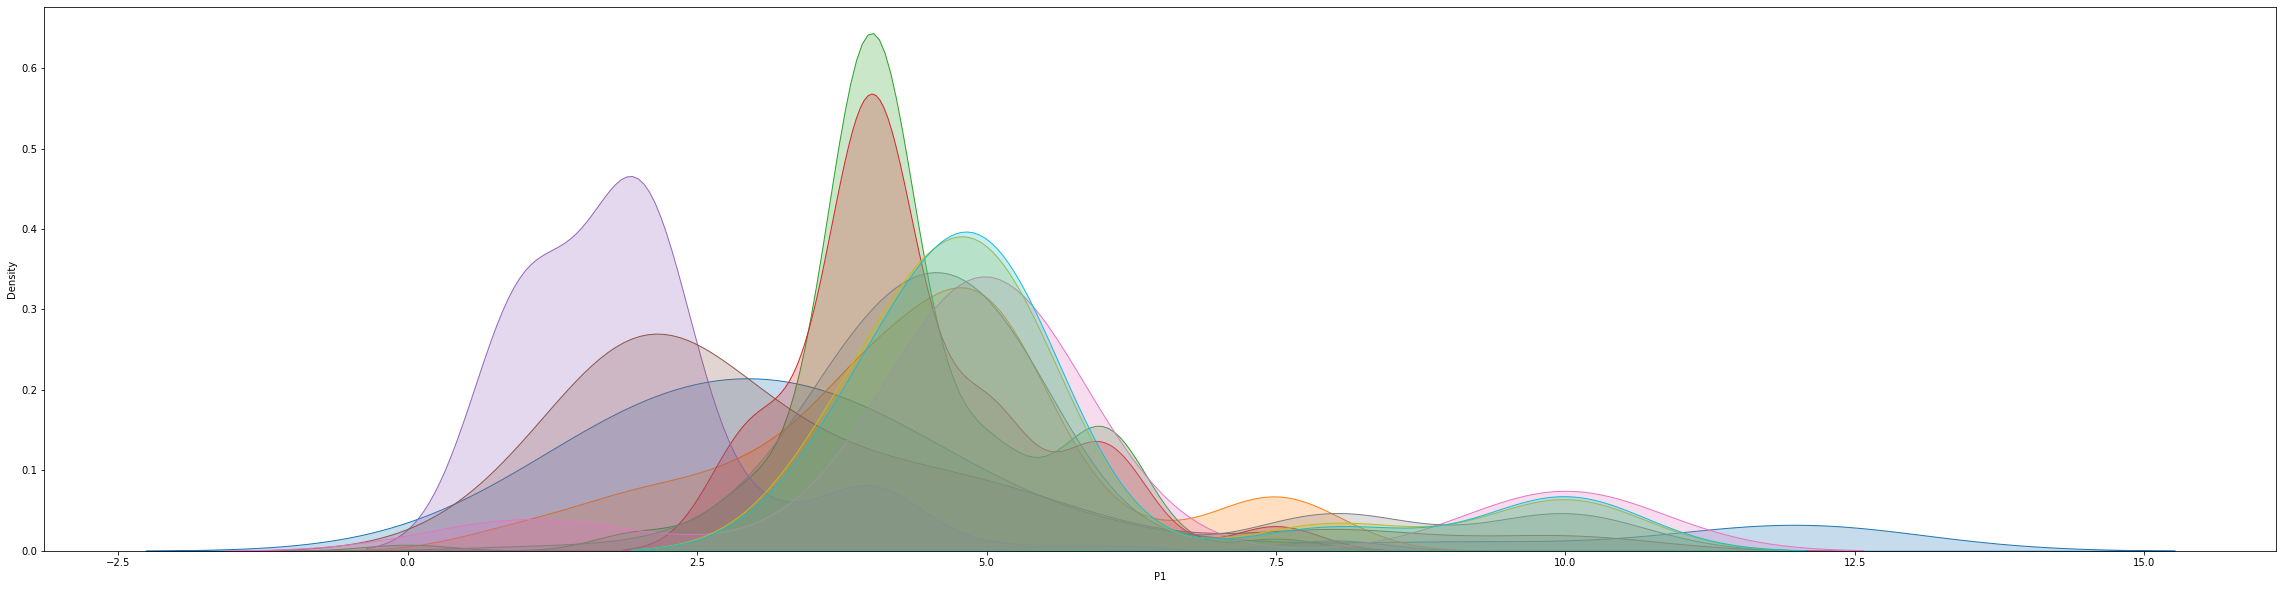

In [29]:
plt.figure(figsize=(40,10))
sns.kdeplot(data['P1'] ,shade=True )
sns.kdeplot(data['P2'] , shade=True )
sns.kdeplot(data['P3'] , shade= True )
sns.kdeplot(data['P4'] , shade= True )
sns.kdeplot(data['P5'] , shade= True )
sns.kdeplot(data['P6'] , shade= True )
sns.kdeplot(data['P7'] , shade= True )
sns.kdeplot(data['P8'] , shade= True )
sns.kdeplot(data['P9'] , shade= True )
sns.kdeplot(data['P10'] , shade= True )
plt.show()

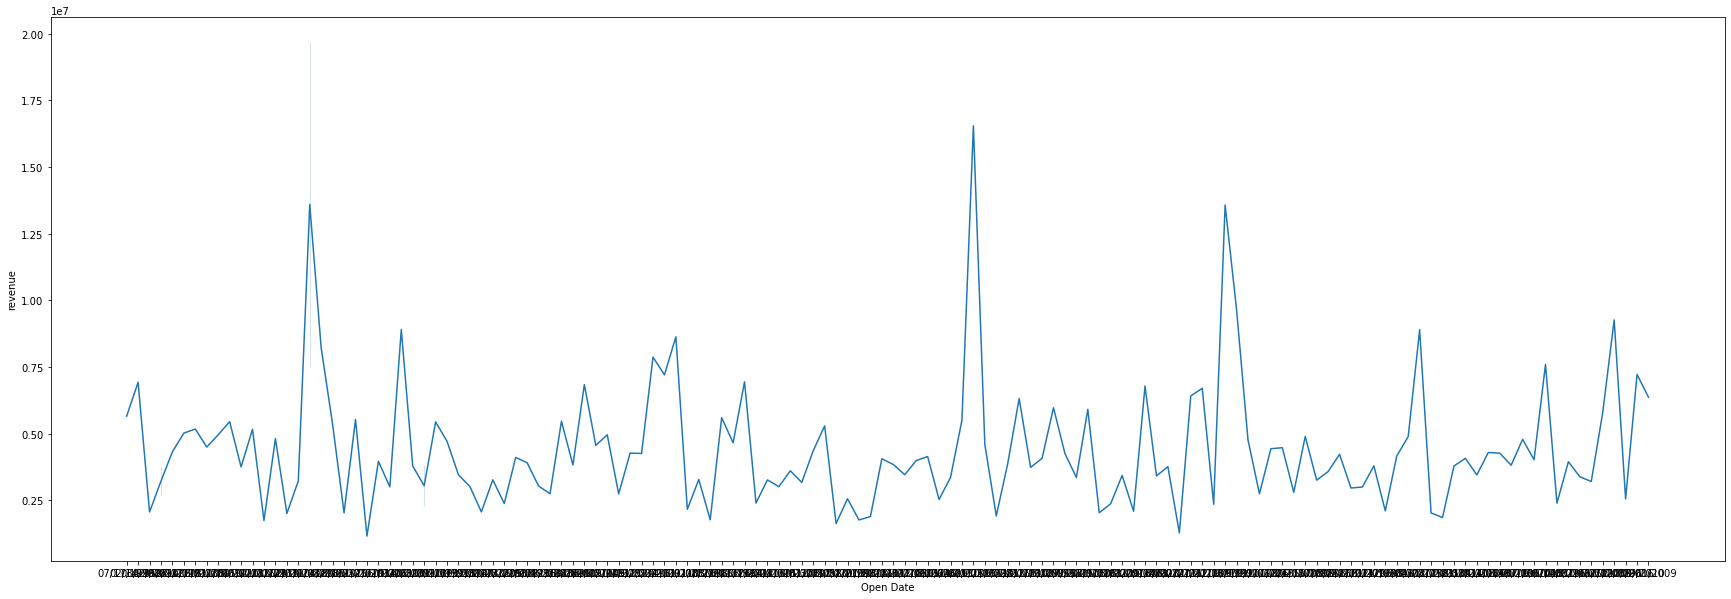

In [30]:
plt.figure(figsize=(30,10))
sns.lineplot(data=data, x='Open Date', y='revenue')
plt.show()

<Figure size 2880x720 with 0 Axes>

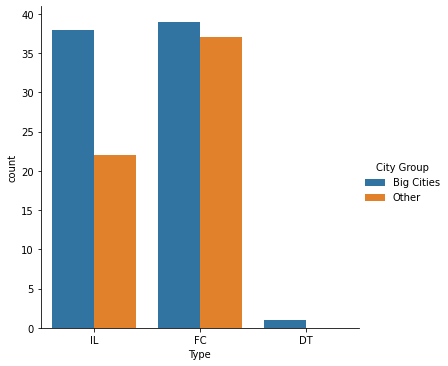

In [31]:
plt.figure(figsize=(40,10))
sns.catplot(x='Type', data=data, kind='count',hue='City Group')
plt.show()

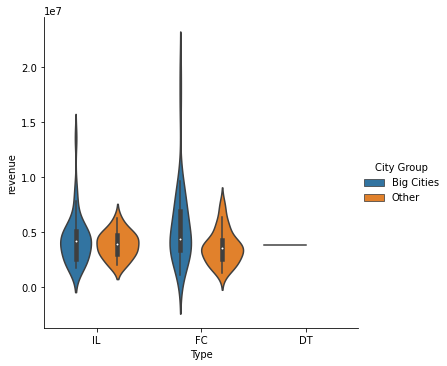

In [32]:
sns.catplot(x='Type', y='revenue', data=data, kind='violin', hue="City Group")

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

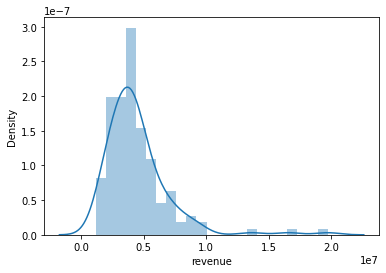

In [33]:
sns.distplot(data['revenue'])

In [34]:
data['Type'].unique()

array(['IL', 'FC', 'DT'], dtype=object)

In [35]:
data[data['Type'] == 'FC']['revenue'].cumsum().plot()

In [36]:
data[data['Type'] == 'IL']['revenue'].cumsum().plot()

# DATA PREPROSESING

In [37]:
data_train=data.copy()

In [38]:
data_train.head()

Id   Open Date        City  City Group Type  P1   P2   P3   P4  P5  ...  \
0   0  07/17/1999    İstanbul  Big Cities   IL   4  5.0  4.0  4.0   2  ...   
1   1  02/14/2008      Ankara  Big Cities   FC   4  5.0  4.0  4.0   1  ...   
2   2  03/09/2013  Diyarbakır       Other   IL   2  4.0  2.0  5.0   2  ...   
3   3  02/02/2012       Tokat       Other   IL   6  4.5  6.0  6.0   4  ...   
4   4  05/09/2009   Gaziantep       Other   IL   3  4.0  3.0  4.0   2  ...   

   P29  P30  P31  P32  P33  P34  P35  P36  P37    revenue  
0  3.0    5    3    4    5    5    4    3    4  5653753.0  
1  3.0    0    0    0    0    0    0    0    0  6923131.0  
2  3.0    0    0    0    0    0    0    0    0  2055379.0  
3  7.5   25   12   10    6   18   12   12    6  2675511.0  
4  3.0    5    1    3    2    3    4    3    3  4316715.0  

[5 rows x 43 columns]

In [39]:
data_train.drop(['Open Date','City'],axis=1,inplace=True)

In [41]:
data_train.head()

Id  City Group Type  P1   P2   P3   P4  P5  P6  P7  ...  P29  P30  P31  \
0   0  Big Cities   IL   4  5.0  4.0  4.0   2   2   5  ...  3.0    5    3   
1   1  Big Cities   FC   4  5.0  4.0  4.0   1   2   5  ...  3.0    0    0   
2   2       Other   IL   2  4.0  2.0  5.0   2   3   5  ...  3.0    0    0   
3   3       Other   IL   6  4.5  6.0  6.0   4   4  10  ...  7.5   25   12   
4   4       Other   IL   3  4.0  3.0  4.0   2   2   5  ...  3.0    5    1   

   P32  P33  P34  P35  P36  P37    revenue  
0    4    5    5    4    3    4  5653753.0  
1    0    0    0    0    0    0  6923131.0  
2    0    0    0    0    0    0  2055379.0  
3   10    6   18   12   12    6  2675511.0  
4    3    2    3    4    3    3  4316715.0  

[5 rows x 41 columns]

## FEATURE ENGINEERING

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
#preprocessing :
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [47]:
label_citygroup=LabelEncoder()
label_type=LabelEncoder()

In [49]:
data_train['City Group'] = label_citygroup.fit_transform(data_train['City Group'])
data_train['Type'] = label_type.fit_transform(data_train['Type'])

In [50]:
data_train.head()

Id  City Group  Type  P1   P2   P3   P4  P5  P6  P7  ...  P29  P30  P31  \
0   0           0     2   4  5.0  4.0  4.0   2   2   5  ...  3.0    5    3   
1   1           0     1   4  5.0  4.0  4.0   1   2   5  ...  3.0    0    0   
2   2           1     2   2  4.0  2.0  5.0   2   3   5  ...  3.0    0    0   
3   3           1     2   6  4.5  6.0  6.0   4   4  10  ...  7.5   25   12   
4   4           1     2   3  4.0  3.0  4.0   2   2   5  ...  3.0    5    1   

   P32  P33  P34  P35  P36  P37    revenue  
0    4    5    5    4    3    4  5653753.0  
1    0    0    0    0    0    0  6923131.0  
2    0    0    0    0    0    0  2055379.0  
3   10    6   18   12   12    6  2675511.0  
4    3    2    3    4    3    3  4316715.0  

[5 rows x 41 columns]

In [ ]:
#data_train.drop(['P11','P12','P13','P14','P15','P16','P18','P19','P20','P21','P22','P23','P24',''])

In [66]:
from sklearn.model_selection import train_test_split

X = data_train.drop('revenue', axis=1)
Y = data_train.revenue

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [67]:
X_train

Id  City Group  Type  P1   P2   P3   P4  P5  P6  P7  ...  P28  P29  P30  \
80    80           0     1   4  5.0  4.0  5.0   1   3   5  ...  5.0  1.0    0   
6      6           0     2   2  3.0  4.0  4.0   1   5   5  ...  1.0  3.0    4   
100  100           0     1   3  5.0  4.0  4.0   2   5   5  ...  4.0  3.0    0   
121  121           0     1   2  4.0  4.0  4.0   2   3   5  ...  2.0  3.0    0   
14    14           1     1   2  2.0  4.0  4.0   1   2   5  ...  2.0  3.0    0   
..   ...         ...   ...  ..  ...  ...  ...  ..  ..  ..  ...  ...  ...  ...   
63    63           1     1   2  2.0  4.0  4.0   3   1   4  ...  1.0  3.0    0   
70    70           0     1   4  5.0  4.0  4.0   1   4   5  ...  3.0  3.0    0   
81    81           0     1   2  4.0  4.0  4.0   1   3   5  ...  2.0  3.0    0   
11    11           0     2   2  4.0  4.0  4.0   2   5   5  ...  3.0  3.0    5   
95    95           1     1   2  4.0  4.0  4.0   2   2   5  ...  1.0  3.0    0   

     P31  P32  P33  P34  P35  P36  P37  
80     0    0    0    0    0    0    0  
6      5    2    2    3    5    4    4  
100    0    0    0    0    0    0    0  
121    0    0    0    0    0    0    0  
14     0    0    0    0    0    0    0  
..   ...  ...  ...  ...  ...  ...  ...  
63     0    0    0    0    0    0    0  
70     0    0    0    0    0    0    0  
81     0    0    0    0    0    0    0  
11     5    4    2    3    4    4    2  
95     0    0    0    0    0    0    0  

[95 rows x 40 columns]

In [72]:
X_train.shape

(95, 40)

## MODEL BUILDING

In [73]:
from sklearn.ensemble import RandomForestRegressor

## RANDON_FOREST_REGRESSOR

In [76]:
model = RandomForestRegressor(n_estimators=1000 ,random_state=0)
model.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [81]:
y_pred = model.predict(X_test)
#print('Score : %.4f' % model.score(X_test, Y_test))

mse = mean_squared_error(Y_test, y_pred)
mae = mean_absolute_error(Y_test, y_pred)
rmse = mean_squared_error(Y_test, y_pred)**0.5
r2 = r2_score(Y_test, y_pred)

print('')
print('MSE    : %0.2f ' % mse)
print('MAE    : %0.2f ' % mae)
print('RMSE   : %0.2f ' % rmse)
print('R2     : %0.2f ' % r2)


MSE    : 8238726497364.66 
MAE    : 1755568.21 
RMSE   : 2870318.19 
R2     : 0.06 


## HYPERPERAMETER TUNNING

## GRID_SEARCH_CV

In [84]:
from sklearn.model_selection import GridSearchCV
params={
     "max_depth": ["None",10, 30, 50, 75, 100],
    "max_features": ["auto",0.3, 0.6],
    "min_samples_leaf": [1,3,5,7],
    "min_samples_split": [2, 4, 8, 12],
    "n_estimators": [30, 50, 100, 200],
    "random_state" : [42]    
}
RFR = RandomForestRegressor()
RFR_grid = GridSearchCV(RFR, params, scoring='r2', cv=7, n_jobs=-1)
RFR_grid.fit(X_train, Y_train)
## Output
print("Best parameters:  {}:".format(RFR_grid.best_params_))
print("Best score: {}".format(RFR_grid.best_score_))


Best parameters:  {'max_depth': 10, 'max_features': 0.3, 'min_samples_leaf': 7, 'min_samples_split': 2, 'n_estimators': 30, 'random_state': 42}:
Best score: -0.21780692821704198


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning:

One or more of the test scores are non-finite: [        nan         nan         nan ... -0.28034358 -0.27434587
 -0.24914942]



In [85]:
rf_regressor = RandomForestRegressor(max_depth = 10,
                                     max_features = 0.3,
                                     min_samples_leaf = 7,
                                    min_samples_split = 2,
                                     random_state = 42,
                                    n_estimators = 30)
rf_regressor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, max_features=0.3, min_samples_leaf=7,
                      n_estimators=30, random_state=42)

In [87]:
from sklearn.metrics import mean_squared_error
y_train_pred = rf_regressor.predict(X_train)
y_pred = rf_regressor.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train_pred, Y_train))
test_rmse = np.sqrt(mean_squared_error(Y_test, y_pred))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

Train RMSE: 1972142.0416
Test RMSE: 2867571.3172


# THE END !!